# Object Distance Inference via API
This notebook sends an image to the FastAPI endpoint, receives
bounding box + distance data, and draws them on the original image.

## 1. Imports and configuration

In [1]:
import requests
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# API endpoint
API_URL = "http://localhost:8000/predict"

# Path to the local image file
IMAGE_PATH = "../data/test/Malls.jpg"  # Change this to your image

## 2. Load the image locally

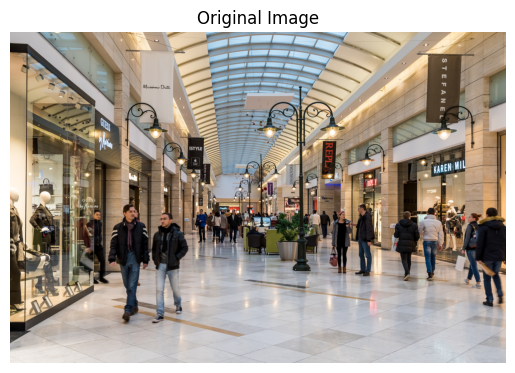

In [2]:
image = Image.open(IMAGE_PATH).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

## 3. Send the image to the API
We send the image as multipart form data.  
The API will return a JSON with bounding boxes and distances.

In [6]:
with open(IMAGE_PATH, "rb") as f:
    files = {"file": (IMAGE_PATH, f, "image/jpeg")}
    data = {
        "camera_pov": 80,
        "height": 1.7,  # Average human height in meters
        "obj_class": "person"  # Specify the class of the object
    }
    response = requests.post(API_URL, files=files, data=data)

response.raise_for_status()
results = response.json()["results"]
results

HTTPError: 500 Server Error: Internal Server Error for url: http://localhost:8000/predict

## 4. Draw bounding boxes and distance labels
The API returns bbox as `[x_min, y_min, x_max, y_max]` and `distance_m`.
We'll draw red boxes and distance text on the image.

In [ ]:
annotated_image = image.copy()
draw = ImageDraw.Draw(annotated_image)

try:
    font = ImageFont.truetype("arial.ttf", 16)
except:
    font = ImageFont.load_default()

for obj in results:
    bbox = obj["bbox"]
    dist = obj["distance_m"]

    # Draw rectangle for bounding box
    draw.rectangle(bbox, outline="red", width=2)

    # Create label text
    label = f"{dist:.2f} m"

    # Get text size using textbbox
    text_bbox = draw.textbbox((0, 0), label, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Background rectangle for text
    text_bg = [bbox[0], bbox[1] - text_height, bbox[0] + text_width, bbox[1]]
    draw.rectangle(text_bg, fill="red")

    # Draw text
    draw.text((bbox[0], bbox[1] - text_height), label, fill="white", font=font)


## 5. Display the annotated image

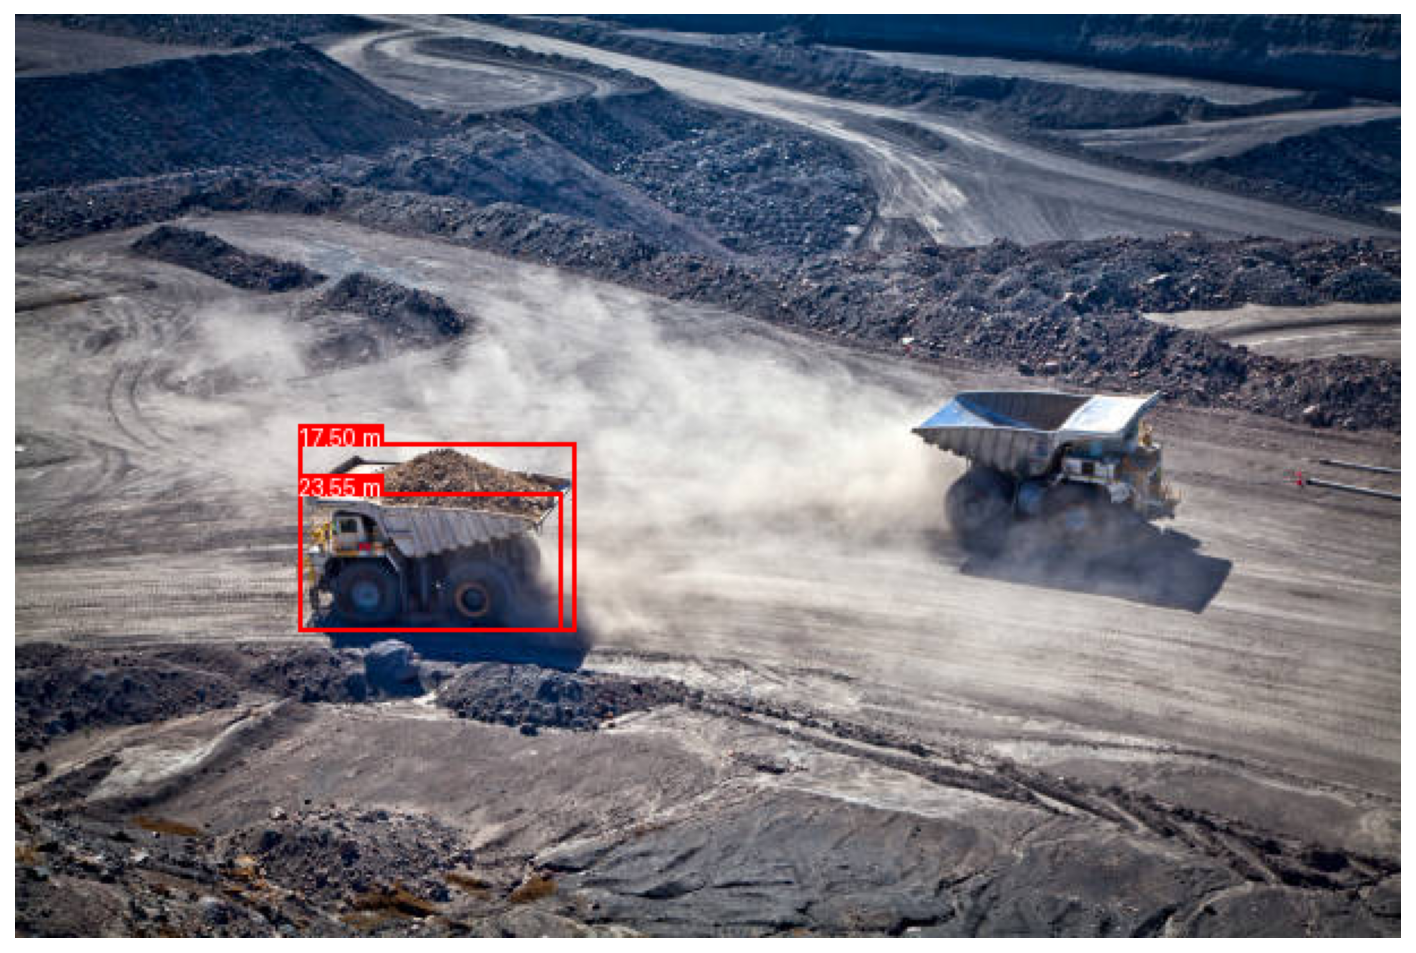

In [ ]:
plt.figure(figsize=(12, 8), dpi=150)  # higher dpi for more clarity
plt.imshow(annotated_image)
plt.axis("off")
plt.show()
